In [ ]:
  #import sys
  #! {sys.executable} -m pip freeze
  #! {sys.executable} -m pip --version

In [ ]:
  #import sys
  #sys.version

In [ ]:
#!pip install azure-cognitiveservices-vision-customvision

In [ ]:
%matplotlib inline

import os
import numpy as np

from PIL import Image
from skimage.transform import resize
from matplotlib import pyplot as plt

# Custom vision

In [1]:
hardshell_dir = "./gear_images/hardshell_jackets/"
hardshell_img = os.listdir(os.fsencode(hardshell_dir))

insulated_dir = "./gear_images/insulated_jackets/"
insulated_img = os.listdir(os.fsencode(insulated_dir))

# Create Custom Vision Project

In [ ]:
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry

# Replace with a valid key
#training_key = "e67b9fbb864242a4b54f405f0b4dde58"
#prediction_key = "13c783ec251e4a0da4346b37590af9f7"
training_key = "e5721209f021479fa6a580fa1180d6d7"
prediction_key = "574dcc4f869f49b7898cb5054d034aa6"

trainer = training_api.TrainingApi(training_key)

# Create a new project
print ("Creating project...")
project = trainer.create_project("HackProject")

In [ ]:
project_id = "b4a93c6f-1f0e-4fe9-b777-3fb3b070eb99"

In [ ]:
hardshell_tag = trainer.create_tag(project_id, "hard_shell")
insulated_tag = trainer.create_tag(project_id, "insulated")

In [ ]:
for image in hardshell_img[:300]:
    with open(hardshell_dir + "/" + os.fsdecode(image), mode="rb") as img_data: 
        trainer.create_images_from_data(project_id, img_data, [ hardshell_tag.id ])


for image in insulated_img[:180]:
    with open(insulated_dir + "/" + os.fsdecode(image), mode="rb") as img_data: 
        trainer.create_images_from_data(project_id, img_data, [ insulated_tag.id ])

In [ ]:
import time

print ("Training...")
iteration = trainer.train_project(project_id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project_id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project_id, iteration.id, is_default=True)
print ("Done!")

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

# Now there is a trained endpoint that can be used to make a prediction

predictor = prediction_endpoint.PredictionEndpoint(prediction_key)

test_img_url = insulated_dir + "/" + os.fsdecode(insulated_img[200])
#results = predictor.predict_image_url(project.id, iteration.id, url=test_img_url)

# Alternatively, if the images were on disk in a folder called Images alongside the sample.py, then
# they can be added by using the following.
#
# Open the sample image and get back the prediction results.
with open(test_img_url, mode="rb") as test_data:
    results = predictor.predict_image(project.id, test_data, iteration.id)

# Display the results.
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))


# Resizing Image

In [ ]:
test_img_url = insulated_dir + "/" + os.fsdecode(insulated_img[200])

print(test_img_url)

basewidth = 300
img = Image.open(test_img_url)

I = np.asarray(img)
I.shape
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('nbo_10229002x1044967_zm.jpeg.jpg')

In [ ]:
test_img_url = insulated_dir + "/" + os.fsdecode(insulated_img[200])
img = Image.open( test_img_url )
img.load()
data = np.asarray( img, dtype="int32" )

In [ ]:
# 255 = Blanc
# 0 = Noir
w, h = 400, 400
b = np.zeros((h, w, 3), dtype=np.uint8) + 255
test = np.hstack((data,b))

from matplotlib import pyplot as plt
plt.imshow(test, interpolation='nearest')
plt.show()

In [160]:
def load_images(path_to_img):
    '''
       Load images and resize them if they are squared and not in 128x128x3
    '''
    #img = PIL.Image.open(path_to_img)
    img = np.array(PIL.Image.open(path_to_img))
    print(img.shape)
    #print(img)
    if(img.shape[0] > img.shape[1]):
        white = np.zeros((img.shape[0], int((img.shape[0] - img.shape[1])/2), 3)) + 255
        img = np.hstack((white, img))
        img = np.hstack((img, white)) / 255
    elif(img.shape[0] < img.shape[1]):
        white = np.zeros((int((img.shape[1] - img.shape[0])/2), img.shape[1], 3)) + 255
        img = np.vstack((white, img))
        img = np.vstack((img, white)) / 255

    basewidth = 128
    img_resized = resize(img, (basewidth, basewidth), mode='reflect')
    return img_resized

In [ ]:
def remi_load_image(path_to_img):
   '''
       Load images and resize them if they are squared and not in 128x128x3
       Input:
           - path_to_img (string): local path to an image
       Output:
           - img (PIL.Image): Image in corrected size.
   '''
    img = Image.open(path_to_img)

    if(img.size[0] > img.size[1]):
        white = np.zeros((img.size[0] - img.size[1], img.size[0],  3)) + 255
        img = np.vstack((np.array(img)[:,:,:3], white))
    elif(img.size[0] < img.size[1]):
        white = np.zeros((img.size[1], img.size[1] - img.size[0], 3)) + 255
        img = np.hstack((np.array(img)[:,:,:3], white))
    img = Image.fromarray(np.uint8(img))
    basewidth = 128
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    return img

(218, 230, 3)


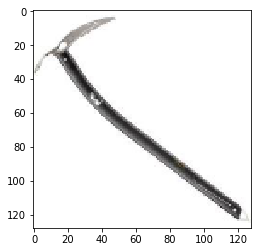

In [118]:
test_img_url = "./gear_images/axes/100172.jpeg"
test = load_images(test_img_url)
plt.imshow(test, interpolation='nearest')
plt.show()

(400, 400, 3)


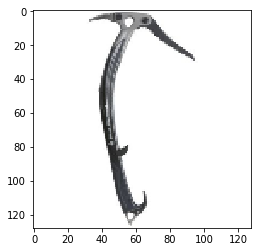

In [119]:
test_img_url = "./gear_images/axes/10036053x1012980_zm.jpeg"
test = load_images(test_img_url)
plt.imshow(test, interpolation='nearest')
plt.show()

(400, 210, 3)


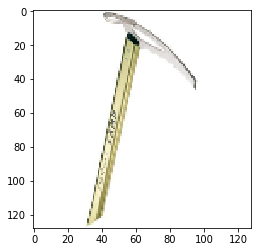

In [135]:
test_img_url = "./gear_images/axes/10045714_zm.jpeg"
test = load_images(test_img_url)
plt.imshow(test, interpolation='nearest')
plt.show()

In [187]:
def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def demo_normalize(filename):
    img = Image.open(filename).convert('RGBA')
    arr = np.array(img)
    new_img = Image.fromarray(normalize(arr).astype('uint8'),'RGBA')
    new_img.save('normalized.png')
    

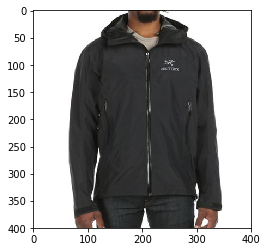

In [191]:
test_img_url = "./gear_images/hardshell_jackets/10184183x1012905_zm.jpeg"

#img = Image.open( test_img_url )
#img.load()
#data = np.asarray( img, dtype="int32" )
#plt.imshow(data, interpolation='nearest')
#plt.show()

test = demo_normalize(test_img_url)
#test = load_images("normalized.png")
img = Image.open("normalized.png")
img.load()
data = np.asarray( img, dtype="int32" )
plt.imshow(data, interpolation='nearest')
plt.show()

# Challenge 3

In [270]:
import sklearn
import pandas as pd
import glob

In [294]:
labels = []
list_imgs = []
a = np.zeros(shape=(2122, (128*128*3)))
count = 0
for element_type in os.listdir('./resized_img//'):
    print(element_type)
    files_only = glob.glob('./resized_img//' + element_type + '//*.*')
    for pic in files_only:
        img = Image.open(pic)
        img = np.array(img).flatten()
        if(img.shape[0] != 49152):
            print(pic , ': ' , img.shape)
        else:
            labels.append(element_type)
            list_imgs.append(img)
            a[count] = img
            count = count + 1
        
print(len(labels))
print(len(list_imgs))

harnesses
crampons
rope
insulated_jackets
tents
gloves
hardshell_jackets
carabiners
boots
axes
new
pulleys
helmets
2122
2122


In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(list_imgs, labels, test_size=0.33, random_state=42)


In [250]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [252]:
y_predict = clf.predict(X_test)

In [255]:
sum(y_predict == y_test) / len(y_test)


0.8002853067047075

In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(list_imgs)
X = scaler.transform(list_imgs)

In [263]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X, labels, cv=5)
scores.mean()

0.8185954376648589

# Challenge 4: Deep Learning

Input Layer (3 channel image input layer)

Convolutional (2D)

Max Pooling

Convolutional (2D)

Max Pooling

Dense (Output layer)

In [284]:
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense, Dropout
from keras.layers.core import Activation
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers
from keras.layers.core import Flatten
from keras.callbacks import ModelCheckpoint

In [295]:
labels = []
list_imgs = []
for element_type in os.listdir('./resized_img//'):
    print(element_type)
    files_only = glob.glob('./resized_img//' + element_type + '//*.*')
    for pic in files_only:
        img = Image.open(pic)
        img = np.array(img)
        labels.append(element_type)
        list_imgs.append(img)
            
print(len(labels))
print(len(list_imgs))

harnesses
crampons
rope
insulated_jackets
tents
gloves
hardshell_jackets
carabiners
boots
axes
new
pulleys
helmets
2122
2122


In [296]:
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
y = lb.transform(labels)
X = np.array(list_imgs)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [297]:
X_train.shape

(1421, 128, 128, 3)

In [ ]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.optimizers import Adam

nb_classes = 12

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


# Adam optimizer
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt,  metrics=['accuracy'])

# Save Best model
save_best = ModelCheckpoint('best_model.h5', monitor='val_pred_score', save_best_only=True)

model_param = model.fit(X_train, y_train,
                                  epochs=30, callbacks=[save_best],
                                  validation_data=(X_test, y_test))